In [16]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd

import cartopy.crs as ccrs
import scipy.stats as stats

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

from shapely.geometry import Point, MultiPolygon

import warnings
warnings.filterwarnings('ignore')

In [2]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil')

In [30]:
COUNTRIES = gpd.read_file(os.path.join('..','..','geometry','SA_countries.geojson'))
COUNTRIES = COUNTRIES.sort_values(by='COUNTRY', ascending=True)
COUNTRIES = COUNTRIES[(COUNTRIES.COUNTRY!='Falkland Islands (UK)')&(COUNTRIES.COUNTRY!='South Georgia and the South Sandwich Is (UK)')]
COUNTRIES = COUNTRIES.reset_index(drop=True)

In [31]:
INFO = pd.read_csv(os.path.join(dir_base,'OBS_CPTEC','INFO_final.csv'))
INFO.head(3)

,File,Lat,Lon,Alt,Max,Mean
0,obs_cptec_02042051.csv,-20.98,-42.51,0.0,147.8,4.48
1,obs_cptec_02142096.csv,-21.07,-42.64,0.0,119.4,4.38
2,obs_cptec_10100000.csv,-4.23,-69.94,0.0,137.4,8.17


In [33]:
total = []

for poly in range(len(COUNTRIES)):
    print(COUNTRIES.COUNTRY[poly])
    multi_poly =COUNTRIES.geometry[poly]

    count = 0
    for nn in range(len(INFO)):
        pt = Point(INFO.Lon[nn], INFO.Lat[nn])
        if multi_poly.contains(pt):
            count += 1
        else:
            continue

    total.append(count)

Argentina
Bolivia
Brazil
Chile
Colombia
Ecuador
French Guiana (France)
Guyana
Paraguay
Peru
Suriname
Uruguay
Venezuela


In [50]:
COUNTRIES['NumEstaciones'] = total
COUNTRIES

,COUNTRY,geometry,NumEstaciones
0,Argentina,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195...",123
1,Bolivia,"MULTIPOLYGON (((-62.19884 -20.47139, -62.26945...",34
2,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ...",3119
3,Chile,"MULTIPOLYGON (((-73.61806 -51.6339, -73.60494 ...",94
4,Colombia,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ...",12
5,Ecuador,"MULTIPOLYGON (((-78.70903 -4.58479, -78.72348 ...",28
6,French Guiana (France),"MULTIPOLYGON (((-54.60378 2.32919, -54.49917 2...",1
7,Guyana,"MULTIPOLYGON (((-60.08087 5.16151, -60.08195 5...",2
8,Paraguay,"MULTIPOLYGON (((-57.67267 -25.2943, -57.70639 ...",18
9,Peru,"MULTIPOLYGON (((-69.5675 -10.95056, -69.56844 ...",27


In [54]:
from matplotlib.colors import LogNorm

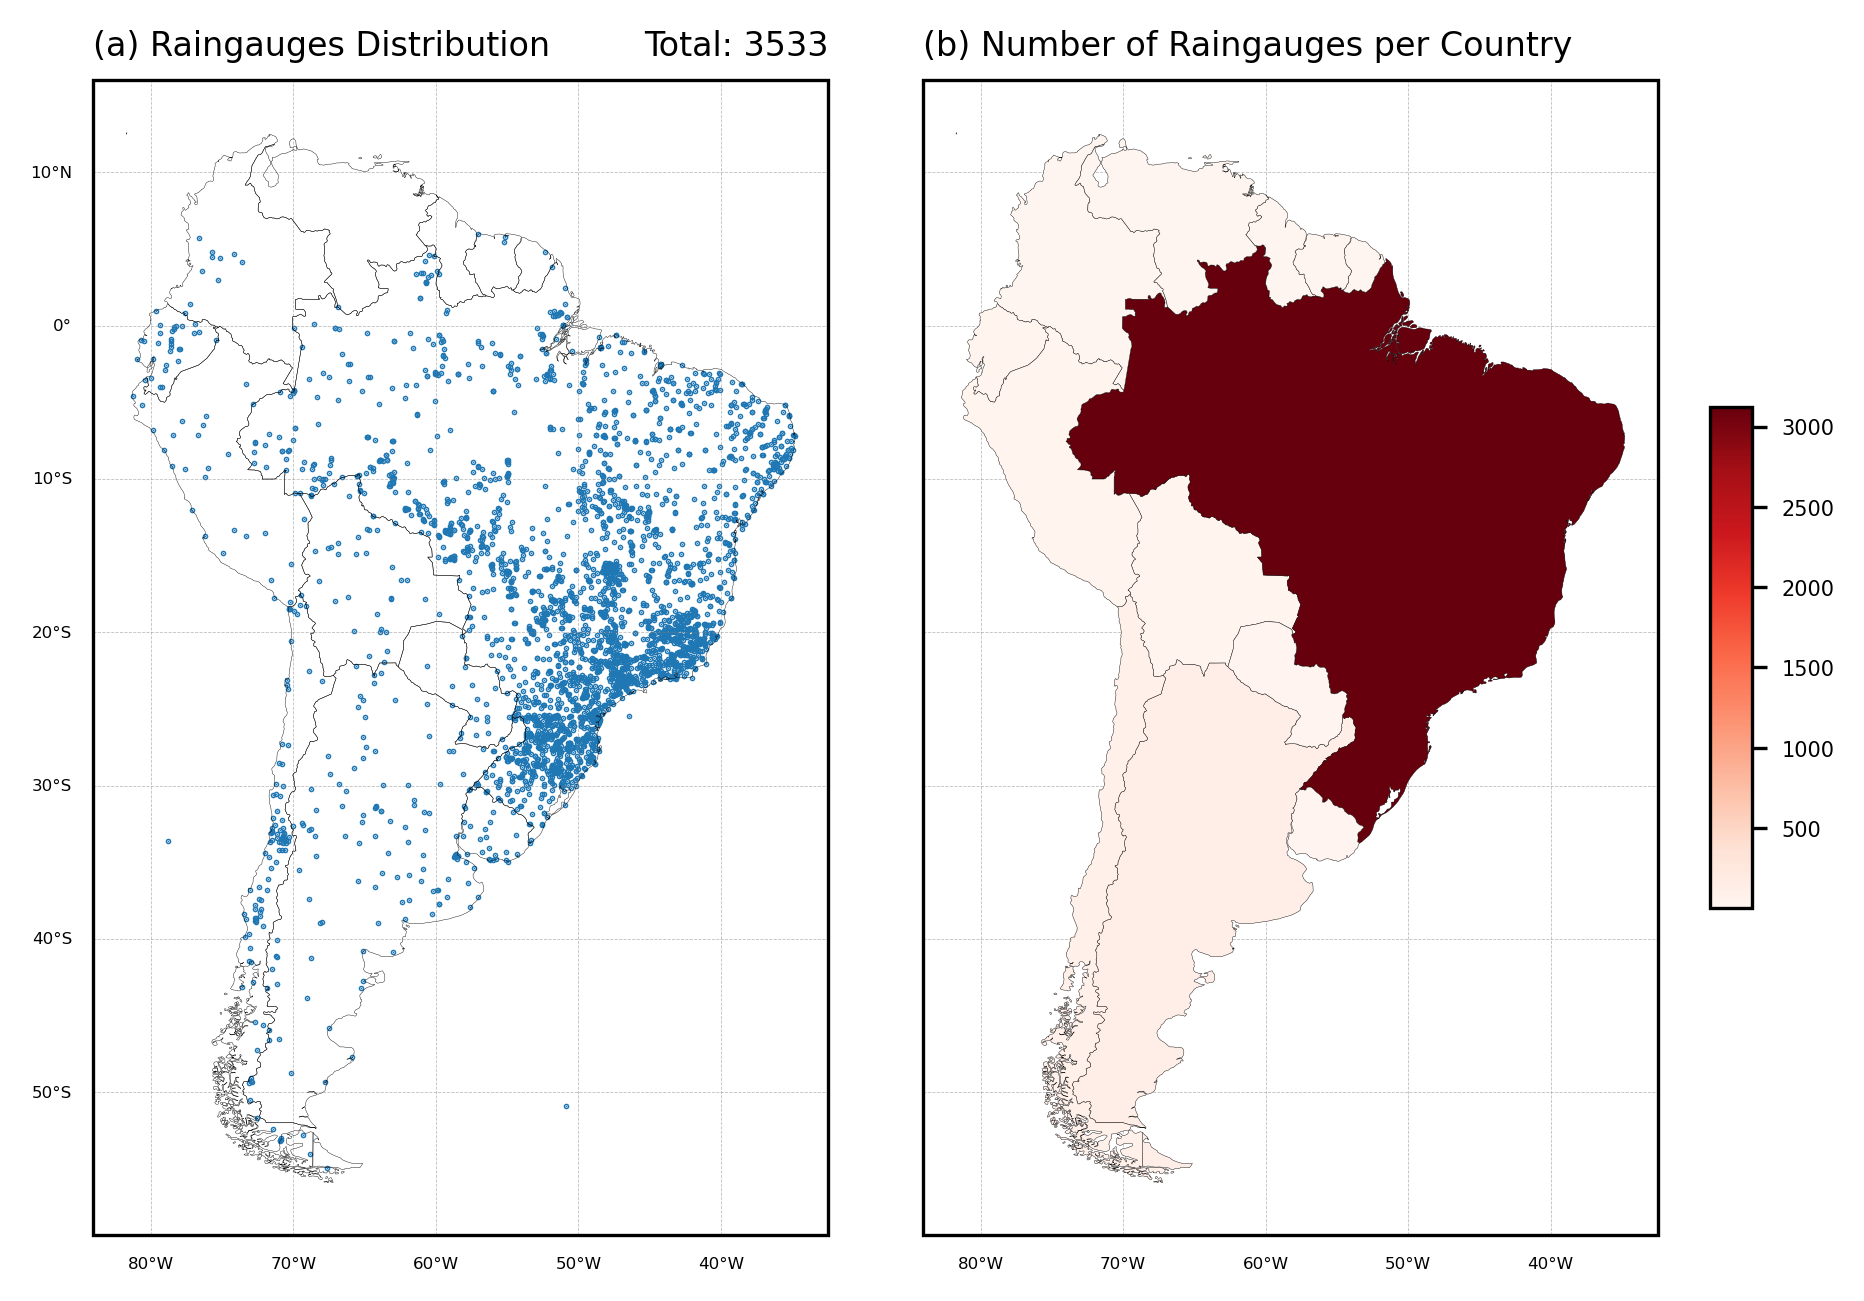

In [61]:
cmap = plt.cm.Reds
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(7,5), dpi=300)
gs = gridspec.GridSpec(1, 2)

# =====================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
COUNTRIES.plot(facecolor='None', ax=ax1, linewidth=0.1, zorder=10)
ax1.scatter(INFO['Lon'],INFO['Lat'],s=0.5,marker='.')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

ax1.set_title('(a) Raingauges Distribution', fontsize=8, loc='left')
ax1.set_title(f'Total: {len(INFO)}', fontsize=8, loc='right')

# =====================================================================================================
ax1 = plt.subplot(gs[0, 1], projection=proj)
COUNTRIES.plot(column='NumEstaciones', cmap=cmap, linewidth=0.1, edgecolor='black', ax=ax1, zorder=10)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}


norm = LogNorm(vmin=1, vmax=np.max(total)) 
# # Opcional: agregar colorbar
sm = plt.cm.ScalarMappable(
                cmap=cmap, 
                norm=plt.Normalize(vmin=np.min(total),vmax=np.max(total)))
sm._A = []  # Para que funcione con colorbar
cbar_ax = fig.add_axes([0.91, 0.328, 0.02, 0.3338])#0.91
cbar = fig.colorbar(sm,  cax=cbar_ax, shrink=0.5)
cbar.ax.tick_params(labelsize=5)

ax1.set_title('(b) Number of Raingauges per Country', fontsize=8, loc='left')

# =====================================================================================================
plt.subplots_adjust(wspace=0.04, hspace=0.16)
